# The Titanic Project

# Importing Data

In [29]:
import pandas as pd
df = pd.read_csv("C:/Users/njoro/Desktop/R/tested.csv")
print(df.count(0), "\n")

print(df.head())

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64 

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN   

In [16]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print out columns with missing values and their corresponding counts
print("Columns with Missing Values:")
print(missing_values)

Columns with Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Data description

survived: Survival(0 = No, 1 = Yes)

pclass: Passenger class(1 = 1st, 2 = 2nd, 3 = 3rd)

Name: Name of the passenger

Sex: Gender of the passenger

Age: Age of the passenger

SibSp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin

Embarked: Port of embarkation
(C = Cherbourg, Q = Queenstown, S = Southampton)



# Descriptive Statistics

In [3]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
#More Decriptive statistics 
# The number of passangers per class and the avarage fare price by passanger class
df['Fare'].groupby(df['Pclass']).describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,107.0,94.280297,84.435858,0.0000,30.10,60.0000,134.5,512.3292
2,93.0,22.202104,13.991877,9.6875,13.00,15.7500,26.0,73.5000
3,217.0,12.459678,10.803698,3.1708,7.75,7.8958,14.4,69.5500




# Data visualizations

Text(0, 0.5, 'Counts')

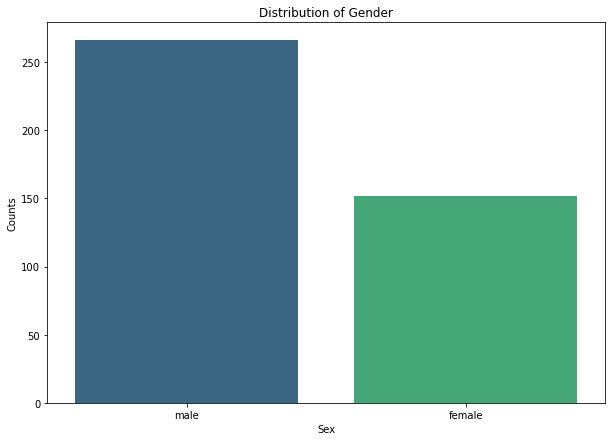

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of Gender
plt.figure(figsize = (10, 7))
plt.title('Distribution of Gender')
sns.countplot(data = df, x = 'Sex', palette = 'viridis')
plt.xlabel('Sex')
plt.ylabel('Counts')


Text(0, 0.5, 'Frequency')

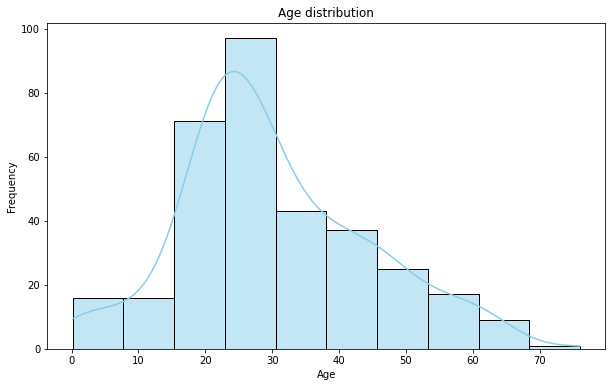

In [6]:
# Age Distribution 

plt.figure(figsize = (10, 6))
plt.title('Age distribution')
sns.histplot(data = df, x= 'Age', bins = 10, kde = True, color = 'skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')



In [7]:
df['Survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Survived
Non-Null Count  Dtype
--------------  -----
418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


<AxesSubplot:title={'center':'Distribution of Passangers per class'}, xlabel='Pclass', ylabel='count'>

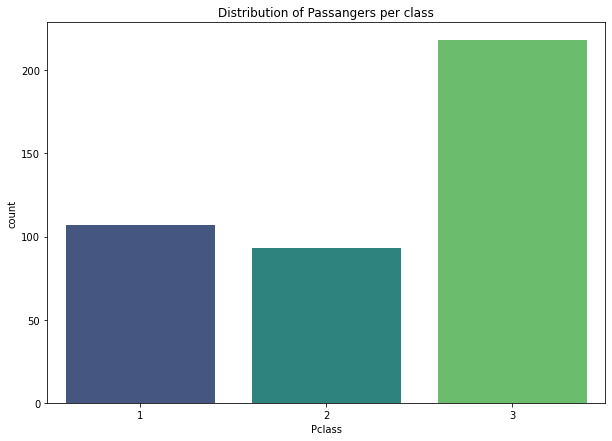

In [8]:
# Distribution of Passengers per class
plt.figure(figsize = (10, 7))
plt.title('Distribution of Passangers per class')
sns.countplot(data = df, x = 'Pclass', palette = 'viridis')

Text(0.5, 0, 'Passenger Class')

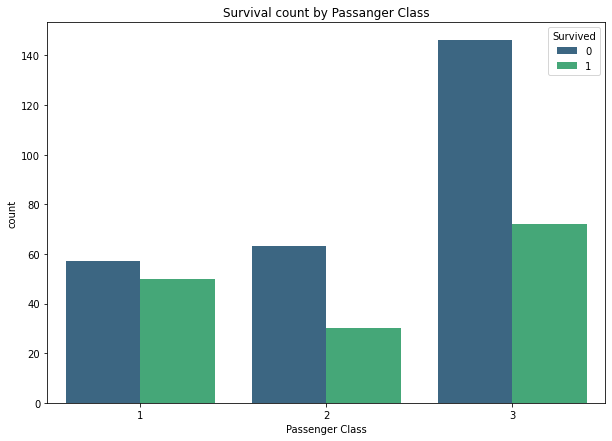

In [9]:
# Survival based on Passenger class
plt.figure(figsize = (10, 7))
plt.title('Survival count by Passanger Class')
sns.countplot(data = df, x = 'Pclass', hue = 'Survived', palette = 'viridis')
plt.xlabel('Passenger Class')


Text(0.5, 0, 'Port of Embarkation')

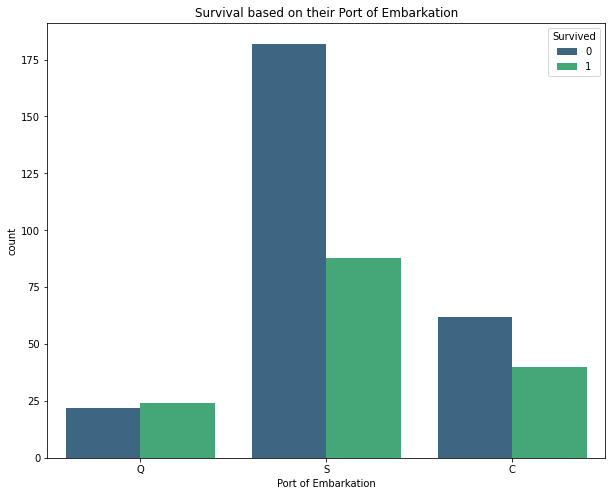

In [10]:
#Now lets check the distribution by  Port of embarkation
plt.figure(figsize = (10, 8))
plt.title('Survival based on their Port of Embarkation')
sns.countplot(data = df, x = 'Embarked', hue = 'Survived', palette = 'viridis')
plt.xlabel('Port of Embarkation')



# Data Preprocessing

In [12]:

import sklearn
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

In [30]:
#First we will remove the unnecessary columns
df = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1)


In [31]:
#Drop all missing values
df = df.dropna()

missing = df.isnull().sum()
print(missing)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [32]:
#Mapping categorical variables to numeric
Gender_map = {'male': 1, 'female' : 0}
df['Sex'] = df['Sex'].map(Gender_map)

df['Embarked'] = df ['Embarked'].map({'Q': 1, 'S': 2, 'C':3})

In [33]:
 
X = df.drop('Survived', axis = 1)
Y = df['Survived']

In [35]:
#Creating the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)



# Model Creation

In [44]:
#Selecting models to be used
models = [LogisticRegression(),SVC(kernel='linear'),
          KNeighborsClassifier(),
          RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(),
          ExtraTreesClassifier(),
          GradientBoostingClassifier(random_state=42)]

model_names = ["Logistic Regression", "SVC (Linear Kernel)", "KNeighborsClassifier", "Random Forest Classifier",
               "Decision Tree Classifier", "Extra Trees Classifier", "Gradient Boosting Classifier"]


In [45]:
# Function to train and evaluate models
def pred_modelling(models, model_names, X_train, Y_train, X_test, Y_test):
    best_models = {}
    for model, name in zip(models, model_names):
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred)
        best_models[name] = model
        print(f'{name}:')
        print(f'Accuracy Score: {accuracy}')
        print(f'Precision Score: {precision}')
        print(f'Recall Score: {recall}')
        print(f'F1 Score: {f1}')
        cm = confusion_matrix(Y_test, Y_pred)
        ConfusionMatrixDisplay(cm, display_labels=['No Survival', 'Survival']).plot()
        plt.show()
        print(' ')
    return best_models


E:\Users\document\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


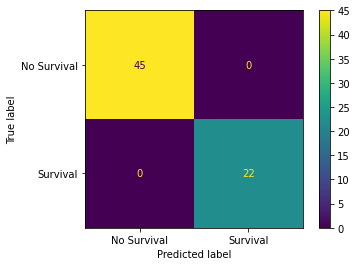

 
SVC (Linear Kernel):
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


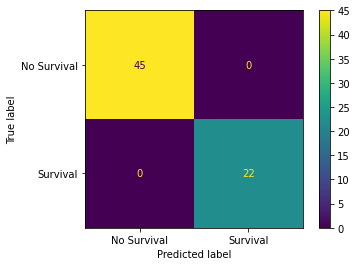

 
KNeighborsClassifier:
Accuracy Score: 0.6865671641791045
Precision Score: 0.5263157894736842
Recall Score: 0.45454545454545453
F1 Score: 0.4878048780487805


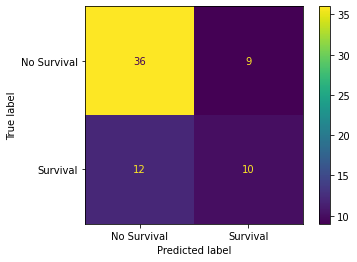

 
Random Forest Classifier:
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


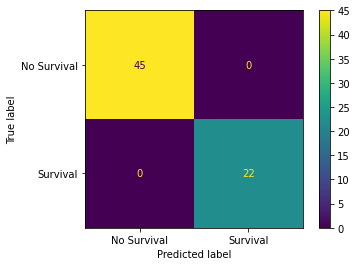

 
Decision Tree Classifier:
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


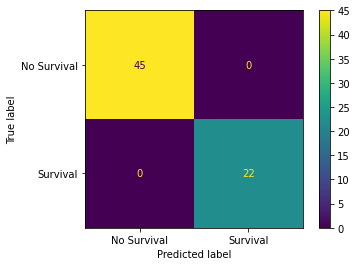

 
Extra Trees Classifier:
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


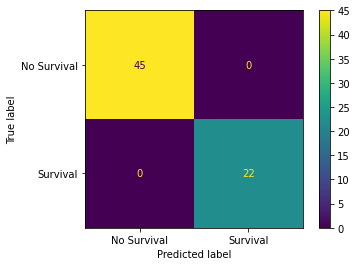

 
Gradient Boosting Classifier:
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


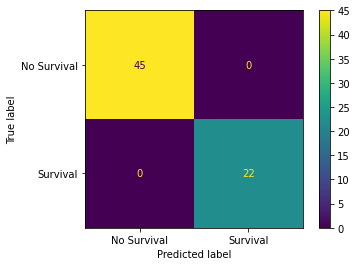

In [46]:
# Running the model evaluation
best_models = pred_modelling(models, model_names, X_train, Y_train, X_test, Y_test)

In [47]:
best_models

{'Logistic Regression': LogisticRegression(),
 'SVC (Linear Kernel)': SVC(kernel='linear'),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'Random Forest Classifier': RandomForestClassifier(random_state=42),
 'Decision Tree Classifier': DecisionTreeClassifier(),
 'Extra Trees Classifier': ExtraTreesClassifier(),
 'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)}



# Allowing users to make their own prediction

In [ ]:
# Function to allow user to select a model and input feature values for prediction
def user_input_prediction(best_models):
    print("Select a model from the list below:")
    for idx, name in enumerate(best_models.keys()):
        print(f"{idx+1}. {name}")
    
    model_index = int(input("Enter the number of the model you want to use: ")) - 1
    selected_model_name = list(best_models.keys())[model_index]
    selected_model = best_models[selected_model_name]
    
    print(f"You selected: {selected_model_name}")
    
    print("Enter the following feature values:")
    Pclass = int(input("Passenger class(1 = 1st, 2 = 2nd, 3 = 3rd): "))
    Sex = int(input("Sex (1 for male, 0 for female): "))
    Age = float(input("Age: "))
    SibSp = int(input("Number of siblings/spouses aboard: "))
    Parch = int(input("Number of parents/children aboard: "))
    Fare = float(input("Passenger fare: "))
    Embarked = int(input("Port of embarkation (1 = Queenstown, 2 = Southampton, 3 = Cherbourg): "))
    
    features = [[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]]
    prediction = selected_model.predict(features)
    
    print(f"The model predicts: {'You would have Survived' if prediction[0] == 1 else 'You would not survive'}")


## Run the code below to see if you would have survived

In [ ]:
# Allowing user to make a prediction
user_input_prediction(best_models)
